In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float, Date


In [4]:
database_path = "Resources/hawaii.sqlite"
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
#connects object to table
Base.metadata.create_all(engine)
#goes and reads database
Base.prepare(engine, reflect=True)
#shows the tables in the database
Base.classes.keys()

# reflect the tables

['measurement', 'station']

In [6]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(bind=engine)

In [7]:
#the following worked but use class and object instead
#stations = engine.execute("SELECT * FROM station")
#for station in stations:
#    print(station)

In [8]:
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [9]:
#print all of the stations in the database
stations = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()
stations = pd.DataFrame(stations)
stations

#put in a DataFrame rather then print out like below
#for station in stations:
#    print(station.name)


,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [10]:
#print all of the measurements in the database
measurements = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs)
measurements = pd.DataFrame(measurements)
measurements

#put in a DataFrame rather then print out like below
#for measurement in measurements:
#    print(measurement.station)

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0
19546,USC00516128,2017-08-20,NaN,78.0
19547,USC00516128,2017-08-21,0.56,76.0
19548,USC00516128,2017-08-22,0.50,76.0


In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(Measurement.date)).first()
date_most_recent = dt.datetime.strptime(most_recent[0], '%Y-%m-%d')
date_most_recent


datetime.datetime(2017, 8, 23, 0, 0)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#date_most_recent from above

# Calculate the date one year from the last date in data set.
date_year_ago = date_most_recent-dt.timedelta(365)
date_year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [15]:
# Perform a query to retrieve the data and precipitation scores

# Perform a query to retrieve the data and precipitation scores
prcpt_12_mo = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=date_year_ago).order_by(Measurement.date.desc()).all()

#prcpt_12_mo
for prctp in prcpt_12_mo:
    print(prctp.date, prctp.prcp)


2017-08-23 0.0
2017-08-23 0.0
2017-08-23 0.08
2017-08-23 0.45
2017-08-22 0.0
2017-08-22 0.0
2017-08-22 0.5
2017-08-21 0.0
2017-08-21 0.02
2017-08-21 None
2017-08-21 0.56
2017-08-20 0.0
2017-08-20 0.01
2017-08-20 None
2017-08-19 0.0
2017-08-19 0.0
2017-08-19 None
2017-08-19 0.09
2017-08-18 0.0
2017-08-18 0.0
2017-08-18 0.06
2017-08-18 None
2017-08-17 0.0
2017-08-17 0.05
2017-08-17 0.01
2017-08-17 0.13
2017-08-16 0.0
2017-08-16 0.07
2017-08-16 0.12
2017-08-16 0.42
2017-08-15 0.02
2017-08-15 0.0
2017-08-15 0.06
2017-08-15 0.32
2017-08-15 0.42
2017-08-14 0.0
2017-08-14 0.01
2017-08-14 0.08
2017-08-14 0.0
2017-08-14 0.22
2017-08-13 0.0
2017-08-13 None
2017-08-13 0.0
2017-08-13 0.0
2017-08-13 None
2017-08-12 0.0
2017-08-12 0.0
2017-08-12 0.14
2017-08-11 0.0
2017-08-11 0.0
2017-08-11 0.0
2017-08-11 None
2017-08-10 0.0
2017-08-10 0.0
2017-08-10 0.0
2017-08-10 0.07
2017-08-09 0.0
2017-08-09 0.0
2017-08-09 0.15
2017-08-08 0.0
2017-08-08 0.1
2017-08-08 0.0
2017-08-08 0.34
2017-08-07 0.0
2017-08-0

2016-12-24 1.08
2016-12-23 0.01
2016-12-23 0.1
2016-12-23 0.03
2016-12-23 None
2016-12-23 0.02
2016-12-23 0.24
2016-12-23 0.83
2016-12-22 0.01
2016-12-22 0.17
2016-12-22 0.05
2016-12-22 None
2016-12-22 0.14
2016-12-22 0.86
2016-12-22 1.24
2016-12-21 0.0
2016-12-21 0.03
2016-12-21 0.09
2016-12-21 0.06
2016-12-21 0.06
2016-12-21 0.11
2016-12-21 0.55
2016-12-20 0.0
2016-12-20 0.02
2016-12-20 0.0
2016-12-20 None
2016-12-20 0.01
2016-12-20 0.0
2016-12-20 0.0
2016-12-19 0.01
2016-12-19 0.21
2016-12-19 0.0
2016-12-19 None
2016-12-19 0.02
2016-12-19 0.03
2016-12-19 0.15
2016-12-18 0.13
2016-12-18 0.29
2016-12-18 0.04
2016-12-18 0.27
2016-12-18 0.16
2016-12-18 None
2016-12-17 0.01
2016-12-17 0.11
2016-12-17 0.0
2016-12-17 0.16
2016-12-17 0.07
2016-12-16 0.0
2016-12-16 0.01
2016-12-16 0.0
2016-12-16 None
2016-12-16 0.0
2016-12-16 0.03
2016-12-16 0.0
2016-12-15 0.0
2016-12-15 0.02
2016-12-15 0.07
2016-12-15 None
2016-12-15 0.0
2016-12-15 0.14
2016-12-15 0.03
2016-12-14 0.03
2016-12-14 0.05
2016-1

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcpt_12_mo_df = pd.DataFrame(prcpt_12_mo[:], columns = ['date', 'prcp'])
prcpt_12_mo_df.set_index('date', inplace = True,)
prcpt_12_mo_df


,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
...,...
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


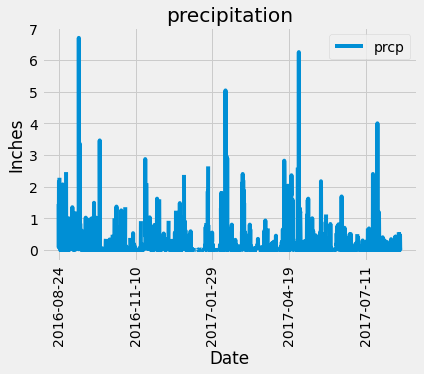

In [18]:
# Sort the dataframe by date
prcpt_12_mo_df =  prcpt_12_mo_df.sort_values('date', ascending=True)

prcpt_12_mo_df = prcpt_12_mo_df.reset_index()

# Use Pandas Plotting with Matplotlib to plot the data
# pandas is the .plot part and Matplotlib is the plt.x and y label


prcpt_12_mo_df.plot(x='date', y="prcp", title = "precipitation", rot=90)

# date = prcpt_12_mo_df["date"]
# precept = prcpt_12_mo_df["prcp"]

# plt.bar(date, precept, color='b', alpha=1, align = 'center')
# plt.xticks(rotation=90)              

# plt.tick_params(labelbottom=False)

plt.xlabel("Date")
plt.ylabel("Inches")

plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpt_12_mo_df["prcp"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
count_stations = session.query(Station.station).count()
count_stations

9

In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations_count = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations_count = pd.DataFrame(active_stations_count, columns = ['Stations','Count'])
active_stations_count

,Stations,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [28]:
active_stations_count.iloc[0]

Stations    USC00519281
Count              2772
Name: 0, dtype: object

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_results = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
temp_results

[(54.0, 85.0, 71.66378066378067)]

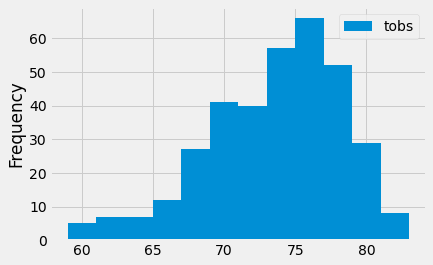

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date>=date_year_ago).all()
last_year_results_df = pd.DataFrame(last_year_results)
last_year_results_df.plot.hist(bins=12)

# Close session

In [31]:
# Close Session
session.close()